### Making Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_csv('master.csv')

In [3]:
data = data.groupby(['worker_id','task_id']).mean()

In [4]:
data = data.reset_index(level=0)
data = data.reset_index(level=0)

In [5]:
data['accuracy'] = (data['accuracy'] * 6).round()
data['accuracy'].value_counts()

6.0    2626
5.0     923
3.0     476
0.0     475
4.0     227
1.0     218
2.0      55
Name: accuracy, dtype: int64

In [6]:
data.loc[data['accuracy']!=6, 'accuracy'] = 0
data['accuracy'].value_counts()

6.0    2626
0.0    2374
Name: accuracy, dtype: int64

In [7]:
data.loc[data['accuracy']==6, 'accuracy'] = 1

In [8]:
data['accuracy'].value_counts()

1.0    2626
0.0    2374
Name: accuracy, dtype: int64

In [9]:
data.head()

,task_id,worker_id,accuracy,keypress_keytypeint,keytype_changed,mouseclick_button,mousemove_distance,timestamp,work_duration
0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc,0.0,6.879310,0.517241,0.068966,19.722592,1.470270e+12,88.318
1,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc,1.0,3.463768,0.217391,0.376812,7.173393,1.470270e+12,34.392
2,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc,1.0,4.918367,0.346939,0.061224,22.958495,1.470270e+12,18.640
3,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc,0.0,6.209302,0.372093,0.093023,8.415718,1.470270e+12,15.841
4,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc,1.0,5.755556,0.333333,0.155556,2.868044,1.470270e+12,15.844


In [39]:
data.columns

Index(['task_id', 'worker_id', 'accuracy', 'keypress_keytypeint',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'timestamp', 'work_duration', 'error'],
      dtype='object')

In [42]:
col = ['keytype_changed', 'mouseclick_button', 'mousemove_distance','work_duration']

for var1 in col:
    for var2 in col:
        if var1!=var2:
            corr = data[var1].corr(data[var2])
            print('------')
            print (var1,var2,corr)
        

------
keytype_changed mouseclick_button -0.420751540423
------
keytype_changed mousemove_distance -0.259760258017
------
keytype_changed work_duration -0.26799666089
------
mouseclick_button keytype_changed -0.420751540423
------
mouseclick_button mousemove_distance 0.490415544385
------
mouseclick_button work_duration 0.249355785896
------
mousemove_distance keytype_changed -0.259760258017
------
mousemove_distance mouseclick_button 0.490415544385
------
mousemove_distance work_duration 0.353309572249
------
work_duration keytype_changed -0.26799666089
------
work_duration mouseclick_button 0.249355785896
------
work_duration mousemove_distance 0.353309572249


## Making individual Matrices

### Making binary matrix

In [10]:
# Feature Scaling
fs = data[['keytype_changed','mouseclick_button','mousemove_distance','work_duration']]
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
fs_mat = sc.fit_transform(fs)

#Converting Array into data Frame
featscale = pd.DataFrame(fs_mat, columns = fs.columns)

#Keytype Changed Binary
keytype_change_binary = pd.concat([featscale[['keytype_changed']],data[['accuracy','task_id','worker_id']]], axis =1)

#Mouseclick Button Binary
mouseclick_button_binary = pd.concat([featscale[['mouseclick_button']],data[['accuracy','task_id','worker_id']]], axis =1)

#Mousemove distance Binary
mousemove_distance_binary = pd.concat([featscale[['mousemove_distance']],data[['accuracy','task_id','worker_id']]], axis =1)

#Work Duration Binary
work_duration_binary = pd.concat([featscale[['work_duration']],data[['accuracy','task_id','worker_id']]], axis =1)

In [11]:
keytype_change_binary.head()

,keytype_changed,accuracy,task_id,worker_id
0,1.572023,0.0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc
1,-1.617880,1.0,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc
2,-0.239712,1.0,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc
3,0.027887,0.0,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc
4,-0.384451,1.0,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc


In [12]:
mouseclick_button_binary.head()

,mouseclick_button,accuracy,task_id,worker_id
0,-0.389499,0.0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc
1,2.112354,1.0,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc
2,-0.452410,1.0,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc
3,-0.193983,0.0,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc
4,0.314214,1.0,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc


In [13]:
mousemove_distance_binary.head()

,mousemove_distance,accuracy,task_id,worker_id
0,0.352269,0.0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc
1,-0.440635,1.0,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc
2,0.556725,1.0,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc
3,-0.362140,0.0,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc
4,-0.712662,1.0,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc


In [14]:
work_duration_binary.head()

,work_duration,accuracy,task_id,worker_id
0,1.920600,0.0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc
1,0.181644,1.0,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc
2,-0.326312,1.0,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc
3,-0.416571,0.0,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc
4,-0.416474,1.0,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc


## Determining best method for keytype Chnage 

### Logistic Regression

In [15]:
#Setting X And Y
x = keytype_change_binary[['keytype_changed']]
y = keytype_change_binary['accuracy']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state =0 )


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

#Making Predictions and printing results
predictions = KNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

[[  0 741]
 [  0 759]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       741
        1.0       0.51      1.00      0.67       759

avg / total       0.26      0.51      0.34      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

[[223 518]
 [150 609]]
             precision    recall  f1-score   support

        0.0       0.60      0.30      0.40       741
        1.0       0.54      0.80      0.65       759

avg / total       0.57      0.55      0.52      1500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[303 438]
 [248 511]]
             precision    recall  f1-score   support

        0.0       0.55      0.41      0.47       741
        1.0       0.54      0.67      0.60       759

avg / total       0.54      0.54      0.53      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Naive Bayes Classifier 

[[163 578]
 [ 98 661]]
             precision    recall  f1-score   support

        0.0       0.62      0.22      0.33       741
        1.0       0.53      0.87      0.66       759

avg / total       0.58      0.55      0.50      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For SVM Classifier 

[[216 525]
 [141 618]]
           

## Determining best method for Mouseclick Button

In [16]:
#Setting X And Y
x = mouseclick_button_binary[['mouseclick_button']]
y = mouseclick_button_binary['accuracy']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0 )


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

#Making Predictions and printing results
predictions = KNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

[[217 524]
 [132 627]]
             precision    recall  f1-score   support

        0.0       0.62      0.29      0.40       741
        1.0       0.54      0.83      0.66       759

avg / total       0.58      0.56      0.53      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

[[313 428]
 [219 540]]
             precision    recall  f1-score   support

        0.0       0.59      0.42      0.49       741
        1.0       0.56      0.71      0.63       759

avg / total       0.57      0.57      0.56      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[349 392]
 [270 489]]
             precision   

## Determining best method for Mousemove Distance Binary

In [17]:
#Setting X And Y
x = mousemove_distance_binary[['mousemove_distance']]
y = mousemove_distance_binary['accuracy']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0 )


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

#Making Predictions and printing results
predictions = KNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

[[154 587]
 [128 631]]
             precision    recall  f1-score   support

        0.0       0.55      0.21      0.30       741
        1.0       0.52      0.83      0.64       759

avg / total       0.53      0.52      0.47      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

[[203 538]
 [157 602]]
             precision    recall  f1-score   support

        0.0       0.56      0.27      0.37       741
        1.0       0.53      0.79      0.63       759

avg / total       0.55      0.54      0.50      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[324 417]
 [311 448]]
             precision   

## Determining best methd for work duration

In [18]:
#Setting X And Y
x = work_duration_binary[['work_duration']]
y = work_duration_binary['accuracy']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0 )


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

#Making Predictions and printing results
predictions = KNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

[[  0 741]
 [  0 759]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       741
        1.0       0.51      1.00      0.67       759

avg / total       0.26      0.51      0.34      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

[[196 545]
 [159 600]]
             precision    recall  f1-score   support

        0.0       0.55      0.26      0.36       741
        1.0       0.52      0.79      0.63       759

avg / total       0.54      0.53      0.50      1500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[340 401]
 [361 398]]
             precision    recall  f1-score   support

        0.0       0.49      0.46      0.47       741
        1.0       0.50      0.52      0.51       759

avg / total       0.49      0.49      0.49      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Naive Bayes Classifier 

[[  0 741]
 [  0 759]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       741
        1.0       0.51      1.00      0.67       759

avg / total       0.26      0.51      0.34      1500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---------------------------------------------------------------------------------------------------------------------
 Printing Results For SVM Classifier 

[[106 635]
 [ 63 696]]
             precision    recall  f1-score   support

        0.0       0.63      0.14      0.23       741
        1.0       0.52      0.92      0.67       759

avg / total       0.57      0.53      0.45      1500

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Decision Tree Classifier 

[[345 396]
 [370 389]]
             precision    recall  f1-score   support

        0.0       0.48      0.47      0.47       741
        1.0       0.50      0.51      0.50       759

avg / total       0.49      0.49      0.49      1500



In [19]:
data['error'] = 0

In [20]:
data.loc[data['accuracy']==0,'error']=1

In [21]:
# Feature Scaling
fs = data[['keytype_changed','mouseclick_button','mousemove_distance','work_duration']]
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
fs_mat = sc.fit_transform(fs)

#Converting Array into data Frame
featscale = pd.DataFrame(fs_mat, columns = fs.columns)

#Keytype Changed Binary
keytype_change_binary_error = pd.concat([featscale[['keytype_changed']],data[['accuracy','task_id','worker_id','error']]], axis =1)

#Mouseclick Button Binary
mouseclick_button_binary_error = pd.concat([featscale[['mouseclick_button']],data[['accuracy','task_id','worker_id','error']]], axis =1)

#Mousemove distance Binary
mousemove_distance_binary_error = pd.concat([featscale[['mousemove_distance']],data[['accuracy','task_id','worker_id','error']]], axis =1)

#Work Duration Binary
work_duration_binary_error = pd.concat([featscale[['work_duration']],data[['accuracy','task_id','worker_id','error']]], axis =1)

## Determining best method for keytype change

In [22]:
#Setting X And Y
x = keytype_change_binary_error[['keytype_changed']]
y = keytype_change_binary_error['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state =0 )


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

#Making Predictions and printing results
predictions = KNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

[[120   0]
 [130   0]]
             precision    recall  f1-score   support

          0       0.48      1.00      0.65       120
          1       0.00      0.00      0.00       130

avg / total       0.23      0.48      0.31       250

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

[[89 31]
 [86 44]]
             precision    recall  f1-score   support

          0       0.51      0.74      0.60       120
          1       0.59      0.34      0.43       130

avg / total       0.55      0.53      0.51       250



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[81 39]
 [71 59]]
             precision    recall  f1-score   support

          0       0.53      0.68      0.60       120
          1       0.60      0.45      0.52       130

avg / total       0.57      0.56      0.56       250

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Naive Bayes Classifier 

[[ 98  22]
 [103  27]]
             precision    recall  f1-score   support

          0       0.49      0.82      0.61       120
          1       0.55      0.21      0.30       130

avg / total       0.52      0.50      0.45       250

---------------------------------------------------------------------------------------------------------------------
 Printing Results For SVM Classifier 

[[94 26]
 [91 39]]
             precis

## Determining best model for MouseClick Button

In [23]:
#Setting X And Y
x = mouseclick_button_binary_error[['mouseclick_button']]
y = mouseclick_button_binary_error['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state =0 )


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

#Making Predictions and printing results
predictions = KNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

[[742 148]
 [616 244]]
             precision    recall  f1-score   support

          0       0.55      0.83      0.66       890
          1       0.62      0.28      0.39       860

avg / total       0.58      0.56      0.53      1750

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

[[661 229]
 [518 342]]
             precision    recall  f1-score   support

          0       0.56      0.74      0.64       890
          1       0.60      0.40      0.48       860

avg / total       0.58      0.57      0.56      1750

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[593 297]
 [479 381]]
             precision   

## Best method for mousemove distance 

In [24]:
#Setting X And Y
x = mousemove_distance_binary_error[['mousemove_distance']]
y = mousemove_distance_binary_error['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state =0 )


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

#Making Predictions and printing results
predictions = KNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

[[755 135]
 [692 168]]
             precision    recall  f1-score   support

          0       0.52      0.85      0.65       890
          1       0.55      0.20      0.29       860

avg / total       0.54      0.53      0.47      1750

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

[[729 161]
 [656 204]]
             precision    recall  f1-score   support

          0       0.53      0.82      0.64       890
          1       0.56      0.24      0.33       860

avg / total       0.54      0.53      0.49      1750

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[537 353]
 [492 368]]
             precision   

In [25]:
#Setting X And Y
x = work_duration_binary_error[['work_duration']]
y = work_duration_binary_error['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state =0 )


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

#Making Predictions and printing results
predictions = KNN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

[[120   0]
 [130   0]]
             precision    recall  f1-score   support

          0       0.48      1.00      0.65       120
          1       0.00      0.00      0.00       130

avg / total       0.23      0.48      0.31       250

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

[[ 90  30]
 [100  30]]
             precision    recall  f1-score   support

          0       0.47      0.75      0.58       120
          1       0.50      0.23      0.32       130

avg / total       0.49      0.48      0.44       250



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[61 59]
 [61 69]]
             precision    recall  f1-score   support

          0       0.50      0.51      0.50       120
          1       0.54      0.53      0.53       130

avg / total       0.52      0.52      0.52       250

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Naive Bayes Classifier 

[[119   1]
 [130   0]]
             precision    recall  f1-score   support

          0       0.48      0.99      0.64       120
          1       0.00      0.00      0.00       130

avg / total       0.23      0.48      0.31       250

---------------------------------------------------------------------------------------------------------------------
 Printing Results For SVM Classifier 

[[ 91  29]
 [102  28]]
             pr

In [26]:
data

,task_id,worker_id,accuracy,keypress_keytypeint,keytype_changed,mouseclick_button,mousemove_distance,timestamp,work_duration,error
0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc,0.0,6.879310,0.517241,0.068966,19.722592,1.470270e+12,88.318,1
1,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc,1.0,3.463768,0.217391,0.376812,7.173393,1.470270e+12,34.392,0
2,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc,1.0,4.918367,0.346939,0.061224,22.958495,1.470270e+12,18.640,0
3,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc,0.0,6.209302,0.372093,0.093023,8.415718,1.470270e+12,15.841,1
4,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc,1.0,5.755556,0.333333,0.155556,2.868044,1.470270e+12,15.844,0
5,57a2997ee2013f0c5a5d9f38,501767d1cb022453170004dc,0.0,6.054054,0.432432,0.108108,6.811904,1.470270e+12,9.907,1
6,57a2997ee2013f0c5a5d9f39,501767d1cb022453170004dc,0.0,6.000000,0.440000,0.160000,5.422883,1.470270e+12,18.598,1
7,57a2997ee2013f0c5a5d9f3a,501767d1cb022453170004dc,1.0,5.904762,0.380952,0.047619,13.941594,1.470270e+12,75.675,0
8,57a2997ee2013f0c5a5d9f3b,501767d1cb022453170004dc,0.0,5.595238,0.357143,0.142857,7.259340,1.470270e+12,17.629,1
9,57a2997ee2013f0c5a5d9f3c,501767d1cb022453170004dc,0.0,2.852174,0.208696,0.417391,37.741768,1.470270e+12,114.393,1


In [27]:
data.columns

Index(['task_id', 'worker_id', 'accuracy', 'keypress_keytypeint',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'timestamp', 'work_duration', 'error'],
      dtype='object')

In [28]:
data_dash = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance','work_duration','error']]

In [29]:
#Setting X And Y
x = data_dash[['keytype_changed']]
y = data_dash['error'].as_matrix()

#Importing train_test_split and applying it to X and Y
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state =0 )

#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x,y) 

#Making Predictions and printing results
predictions = RFC.predict(x)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print (confusion_matrix(y, predictions))
print (classification_report(y, predictions))


---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

[[1989  637]
 [1012 1362]]
             precision    recall  f1-score   support

          0       0.66      0.76      0.71      2626
          1       0.68      0.57      0.62      2374

avg / total       0.67      0.67      0.67      5000



In [30]:
rferror = pd.DataFrame(predictions)

In [31]:
data_dash = pd.concat([data_dash,rferror],axis=1)

In [32]:
data_dash

,keytype_changed,mouseclick_button,mousemove_distance,work_duration,error,0
0,0.517241,0.068966,19.722592,88.318,1,1
1,0.217391,0.376812,7.173393,34.392,0,0
2,0.346939,0.061224,22.958495,18.640,0,0
3,0.372093,0.093023,8.415718,15.841,1,0
4,0.333333,0.155556,2.868044,15.844,0,0
5,0.432432,0.108108,6.811904,9.907,1,0
6,0.440000,0.160000,5.422883,18.598,1,1
7,0.380952,0.047619,13.941594,75.675,0,1
8,0.357143,0.142857,7.259340,17.629,1,0
9,0.208696,0.417391,37.741768,114.393,1,1


In [33]:
data_dash.rename(columns={0:'predict with keytype changed'}, inplace = True)

In [34]:
data_dash['error'].corr(data_dash['predict with keytype changed'])

0.33756799770964774

In [2]:
data = pd.read_csv('master_with_work_duration.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'task_id', 'worker_id', 'accuracy', 'keypress_keytypeint',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'timestamp', 'work_duration', 'error', 'mousemove_distance_time',
       'mouseclick_button_time', 'keytype_changed_time'],
      dtype='object')

keytype_changed
Logistic Regression Binary


C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1293    0]
 [1207    0]]
             precision    recall  f1-score   support

          0       0.52      1.00      0.68      1293
          1       0.00      0.00      0.00      1207

avg / total       0.27      0.52      0.35      2500



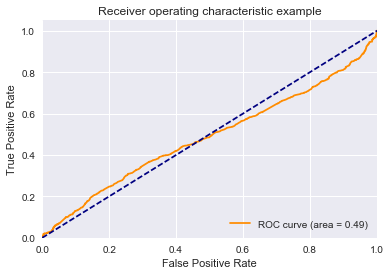

Area Under the ROC Curve is  0.48669337347


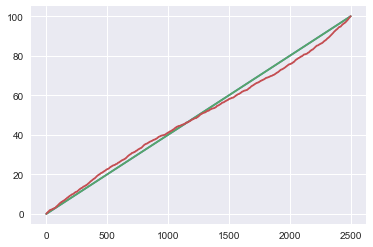

      actual     prob  total_select_percent  random_select_percent  \
1249     1.0  0.46684                  50.0                   50.0   

      model_select_percent  
1249             49.378625  
KNN


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[1058  235]
 [ 862  345]]
             precision    recall  f1-score   support

          0       0.55      0.82      0.66      1293
          1       0.59      0.29      0.39      1207

avg / total       0.57      0.56      0.53      2500



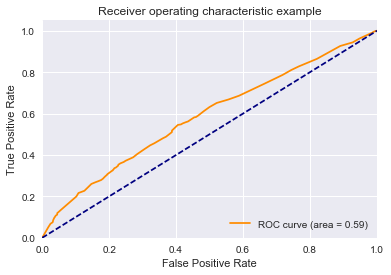

Area Under the ROC Curve is  0.585969572954


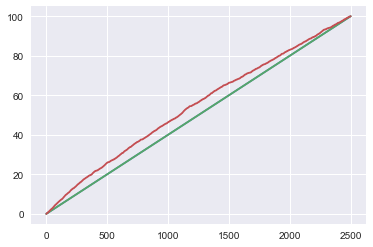

Random Forrest


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[846 447]
 [685 522]]
             precision    recall  f1-score   support

          0       0.55      0.65      0.60      1293
          1       0.54      0.43      0.48      1207

avg / total       0.55      0.55      0.54      2500



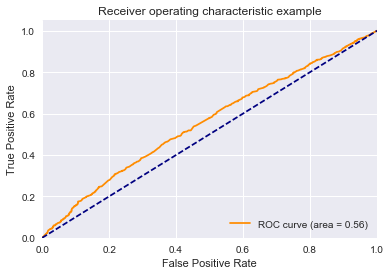

Area Under the ROC Curve is  0.557609292532


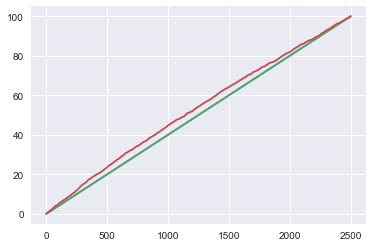

Decision Tree
[[915 378]
 [752 455]]
             precision    recall  f1-score   support

          0       0.55      0.71      0.62      1293
          1       0.55      0.38      0.45      1207

avg / total       0.55      0.55      0.54      2500



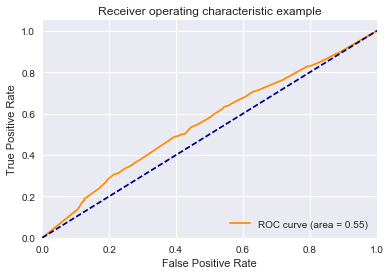

Area Under the ROC Curve is  0.55449104252


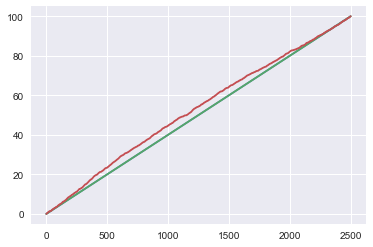

Naive Bayes
[[1151  142]
 [ 957  250]]
             precision    recall  f1-score   support

          0       0.55      0.89      0.68      1293
          1       0.64      0.21      0.31      1207

avg / total       0.59      0.56      0.50      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


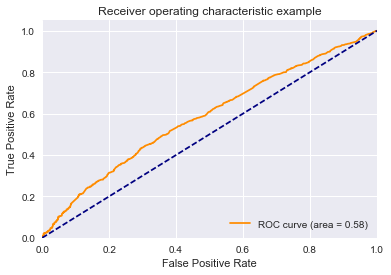

Area Under the ROC Curve is  0.584737715223


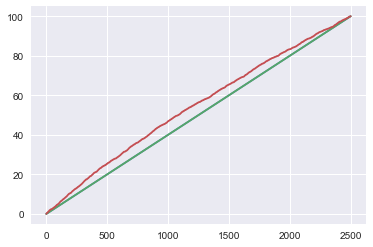

Naive Bayes
[[1293    0]
 [1203    4]]
             precision    recall  f1-score   support

          0       0.52      1.00      0.68      1293
          1       1.00      0.00      0.01      1207

avg / total       0.75      0.52      0.36      2500



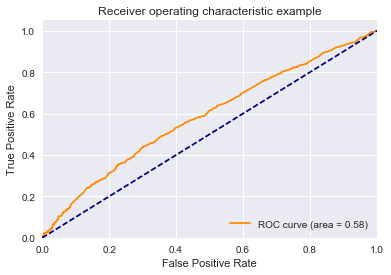

Area Under the ROC Curve is  0.58486298346


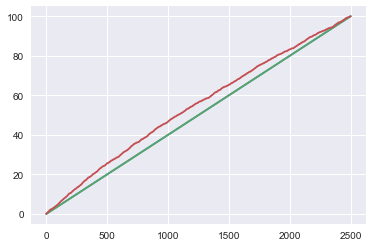

mouseclick_button
Logistic Regression Binary
[[1092  201]
 [ 883  324]]
             precision    recall  f1-score   support

          0       0.55      0.84      0.67      1293
          1       0.62      0.27      0.37      1207

avg / total       0.58      0.57      0.53      2500



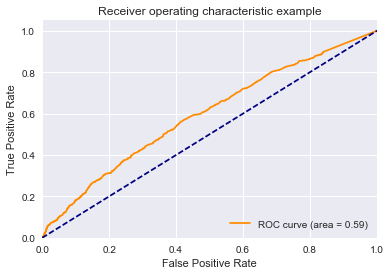

Area Under the ROC Curve is  0.593665399888


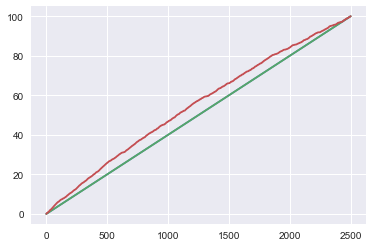

      actual      prob  total_select_percent  random_select_percent  \
1249     0.0  0.448028                  50.0                   50.0   

      model_select_percent  
1249             57.415079  
KNN


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[896 397]
 [675 532]]
             precision    recall  f1-score   support

          0       0.57      0.69      0.63      1293
          1       0.57      0.44      0.50      1207

avg / total       0.57      0.57      0.56      2500



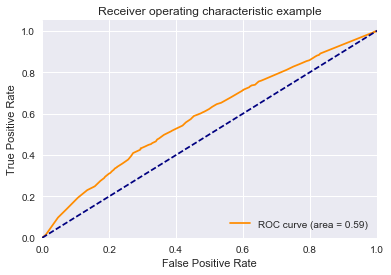

Area Under the ROC Curve is  0.588778977491


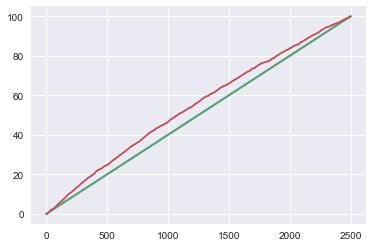

Random Forrest


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[840 453]
 [684 523]]
             precision    recall  f1-score   support

          0       0.55      0.65      0.60      1293
          1       0.54      0.43      0.48      1207

avg / total       0.54      0.55      0.54      2500



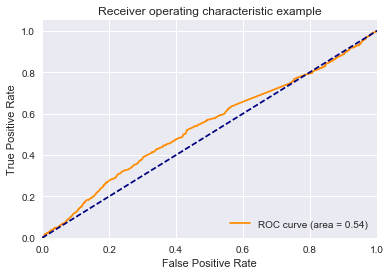

Area Under the ROC Curve is  0.539075360218


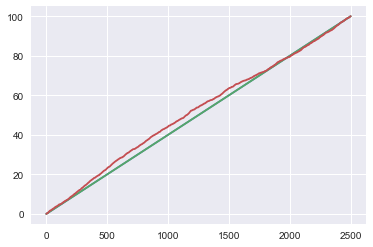

Decision Tree
[[916 377]
 [758 449]]
             precision    recall  f1-score   support

          0       0.55      0.71      0.62      1293
          1       0.54      0.37      0.44      1207

avg / total       0.55      0.55      0.53      2500



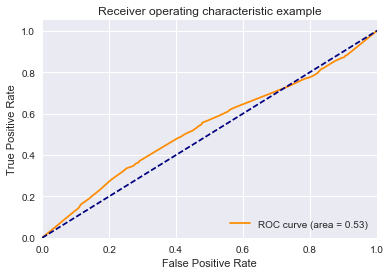

Area Under the ROC Curve is  0.533844850642


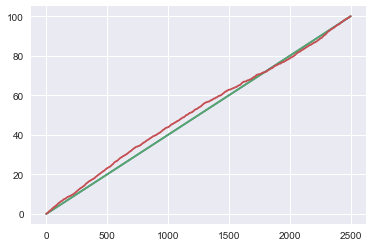

Naive Bayes
[[1125  168]
 [ 941  266]]
             precision    recall  f1-score   support

          0       0.54      0.87      0.67      1293
          1       0.61      0.22      0.32      1207

avg / total       0.58      0.56      0.50      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


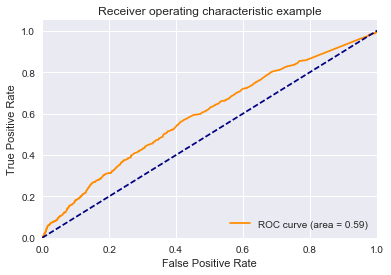

Area Under the ROC Curve is  0.592557528877


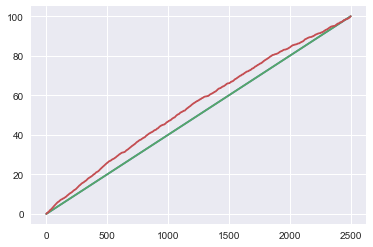

Naive Bayes
[[1103  190]
 [ 894  313]]
             precision    recall  f1-score   support

          0       0.55      0.85      0.67      1293
          1       0.62      0.26      0.37      1207

avg / total       0.59      0.57      0.52      2500



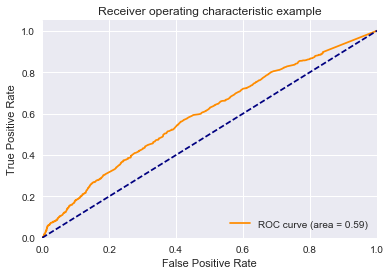

Area Under the ROC Curve is  0.59371954396


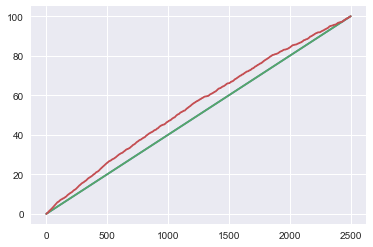

mousemove_distance
Logistic Regression Binary
[[1104  189]
 [ 964  243]]
             precision    recall  f1-score   support

          0       0.53      0.85      0.66      1293
          1       0.56      0.20      0.30      1207

avg / total       0.55      0.54      0.48      2500



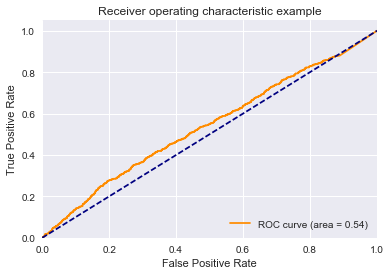

Area Under the ROC Curve is  0.539377157353


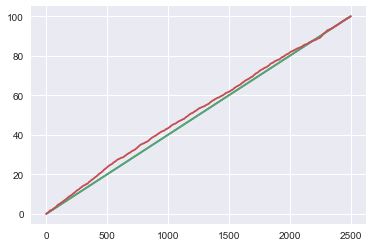

      actual     prob  total_select_percent  random_select_percent  \
1249     1.0  0.45437                  50.0                   50.0   

      model_select_percent  
1249             53.106877  
KNN


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[1003  290]
 [ 841  366]]
             precision    recall  f1-score   support

          0       0.54      0.78      0.64      1293
          1       0.56      0.30      0.39      1207

avg / total       0.55      0.55      0.52      2500



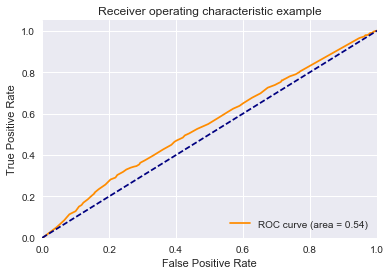

Area Under the ROC Curve is  0.544873901981


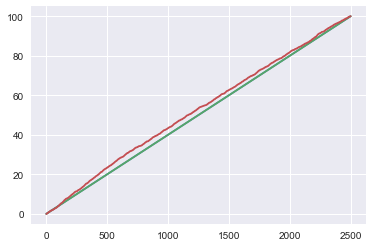

Random Forrest


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[749 544]
 [702 505]]
             precision    recall  f1-score   support

          0       0.52      0.58      0.55      1293
          1       0.48      0.42      0.45      1207

avg / total       0.50      0.50      0.50      2500



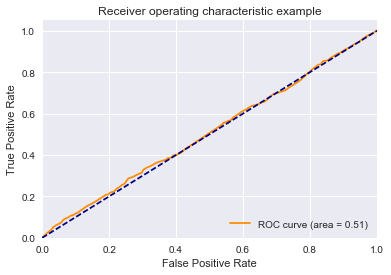

Area Under the ROC Curve is  0.508343313143


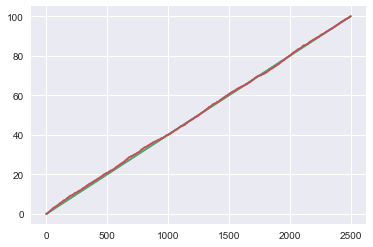

Decision Tree
[[749 544]
 [702 505]]
             precision    recall  f1-score   support

          0       0.52      0.58      0.55      1293
          1       0.48      0.42      0.45      1207

avg / total       0.50      0.50      0.50      2500



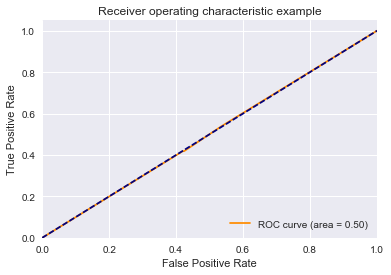

Area Under the ROC Curve is  0.500317495712


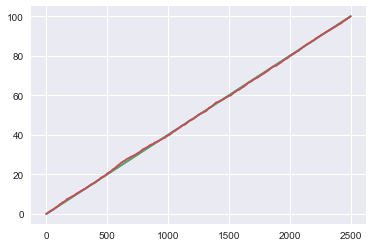

Naive Bayes
[[1117  176]
 [ 987  220]]
             precision    recall  f1-score   support

          0       0.53      0.86      0.66      1293
          1       0.56      0.18      0.27      1207

avg / total       0.54      0.53      0.47      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


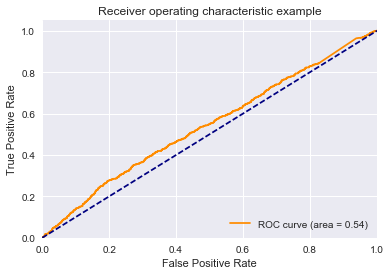

Area Under the ROC Curve is  0.542461767557


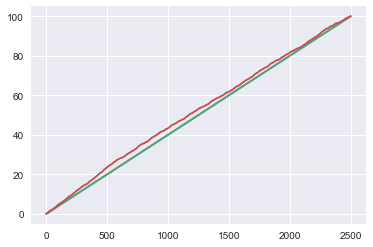

Naive Bayes
[[987 306]
 [889 318]]
             precision    recall  f1-score   support

          0       0.53      0.76      0.62      1293
          1       0.51      0.26      0.35      1207

avg / total       0.52      0.52      0.49      2500



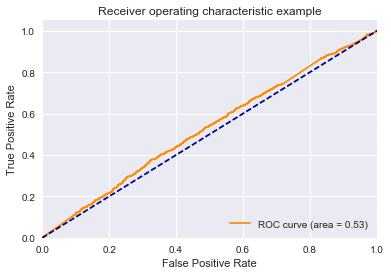

Area Under the ROC Curve is  0.527494616029


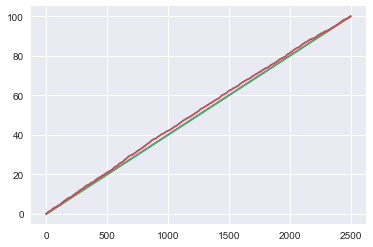

work_duration
Logistic Regression Binary
[[1293    0]
 [1207    0]]
             precision    recall  f1-score   support

          0       0.52      1.00      0.68      1293
          1       0.00      0.00      0.00      1207

avg / total       0.27      0.52      0.35      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


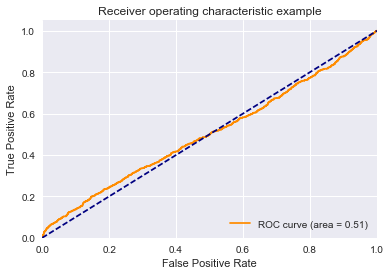

Area Under the ROC Curve is  0.505328865967


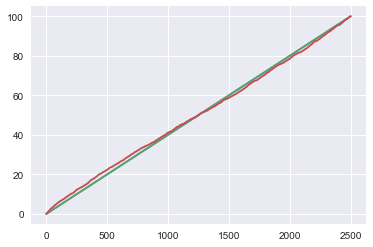

      actual     prob  total_select_percent  random_select_percent  \
1249     1.0  0.46822                  50.0                   50.0   

      model_select_percent  
1249             49.958575  
KNN


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[1105  188]
 [ 973  234]]
             precision    recall  f1-score   support

          0       0.53      0.85      0.66      1293
          1       0.55      0.19      0.29      1207

avg / total       0.54      0.54      0.48      2500



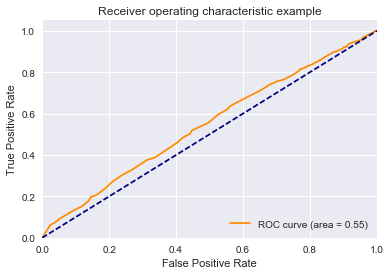

Area Under the ROC Curve is  0.546653287634


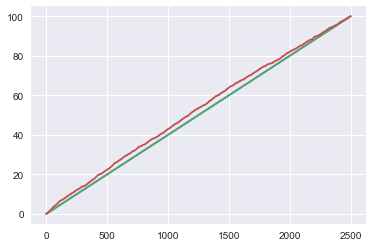

Random Forrest


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[692 601]
 [670 537]]
             precision    recall  f1-score   support

          0       0.51      0.54      0.52      1293
          1       0.47      0.44      0.46      1207

avg / total       0.49      0.49      0.49      2500



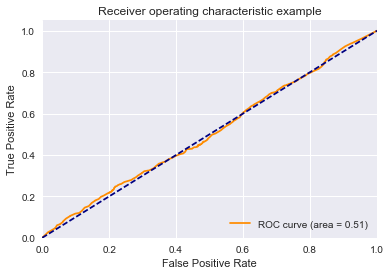

Area Under the ROC Curve is  0.505932460236


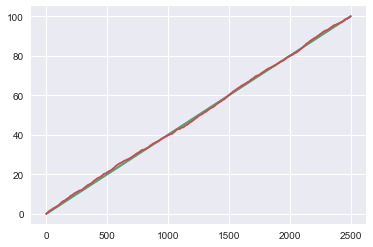

Decision Tree
[[694 599]
 [677 530]]
             precision    recall  f1-score   support

          0       0.51      0.54      0.52      1293
          1       0.47      0.44      0.45      1207

avg / total       0.49      0.49      0.49      2500



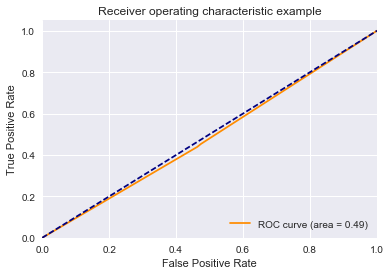

Area Under the ROC Curve is  0.488664025461


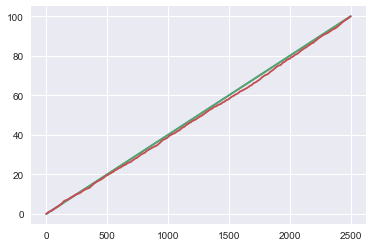

Naive Bayes
[[1293    0]
 [1207    0]]
             precision    recall  f1-score   support

          0       0.52      1.00      0.68      1293
          1       0.00      0.00      0.00      1207

avg / total       0.27      0.52      0.35      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


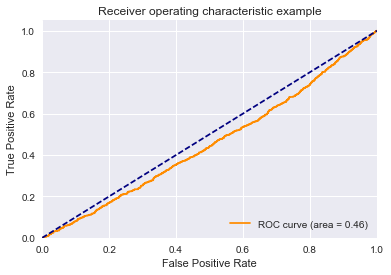

Area Under the ROC Curve is  0.457720528164


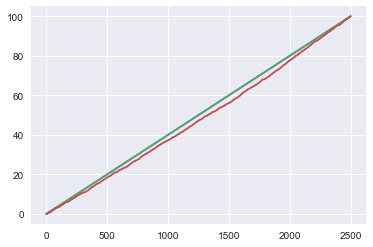

Naive Bayes
[[842 451]
 [735 472]]
             precision    recall  f1-score   support

          0       0.53      0.65      0.59      1293
          1       0.51      0.39      0.44      1207

avg / total       0.52      0.53      0.52      2500



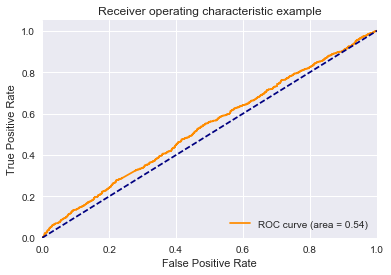

Area Under the ROC Curve is  0.535133095099


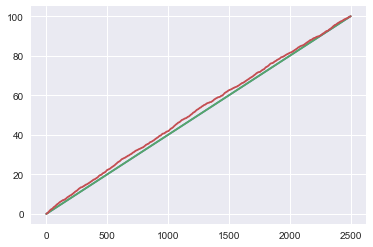

mousemove_distance_time
Logistic Regression Binary
[[1100  193]
 [ 975  232]]
             precision    recall  f1-score   support

          0       0.53      0.85      0.65      1293
          1       0.55      0.19      0.28      1207

avg / total       0.54      0.53      0.48      2500



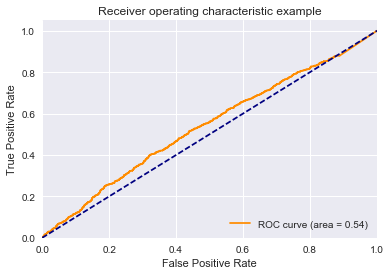

Area Under the ROC Curve is  0.538479134669


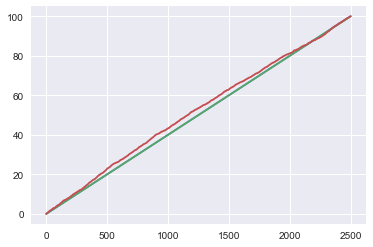

      actual      prob  total_select_percent  random_select_percent  \
1249     0.0  0.458633                  50.0                   50.0   

      model_select_percent  
1249             53.521127  
KNN


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[915 378]
 [777 430]]
             precision    recall  f1-score   support

          0       0.54      0.71      0.61      1293
          1       0.53      0.36      0.43      1207

avg / total       0.54      0.54      0.52      2500



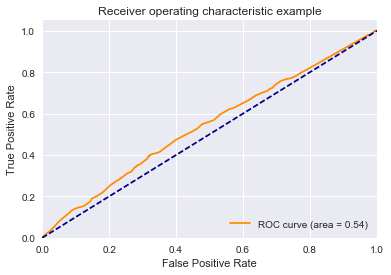

Area Under the ROC Curve is  0.54147339796


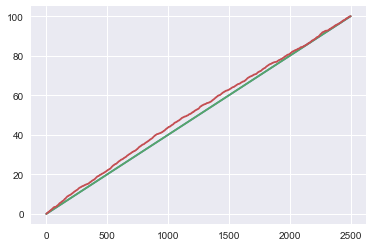

Random Forrest


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[746 547]
 [665 542]]
             precision    recall  f1-score   support

          0       0.53      0.58      0.55      1293
          1       0.50      0.45      0.47      1207

avg / total       0.51      0.52      0.51      2500



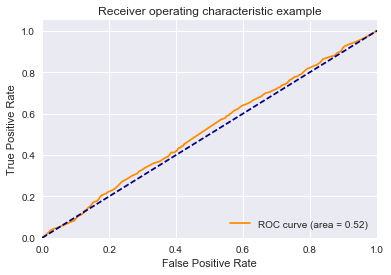

Area Under the ROC Curve is  0.520377073414


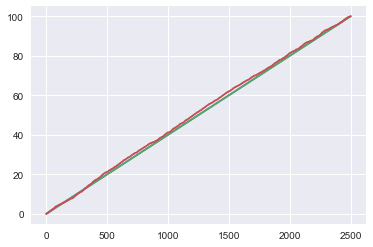

Decision Tree
[[746 547]
 [665 542]]
             precision    recall  f1-score   support

          0       0.53      0.58      0.55      1293
          1       0.50      0.45      0.47      1207

avg / total       0.51      0.52      0.51      2500



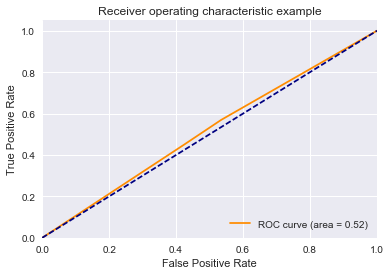

Area Under the ROC Curve is  0.516975928635


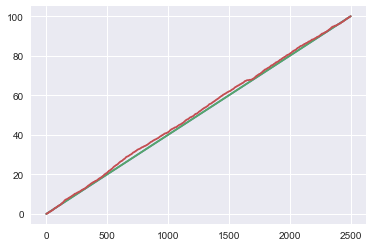

Naive Bayes
[[1115  178]
 [ 999  208]]
             precision    recall  f1-score   support

          0       0.53      0.86      0.65      1293
          1       0.54      0.17      0.26      1207

avg / total       0.53      0.53      0.46      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


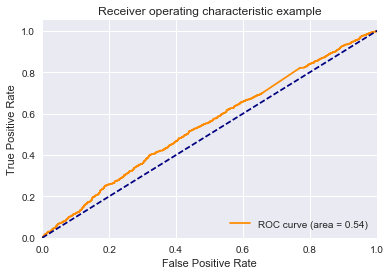

Area Under the ROC Curve is  0.54425621103


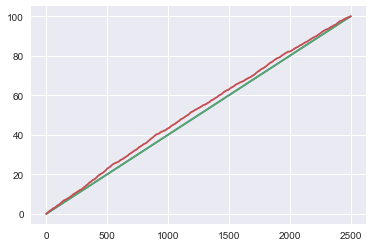

Naive Bayes
[[986 307]
 [876 331]]
             precision    recall  f1-score   support

          0       0.53      0.76      0.63      1293
          1       0.52      0.27      0.36      1207

avg / total       0.52      0.53      0.50      2500



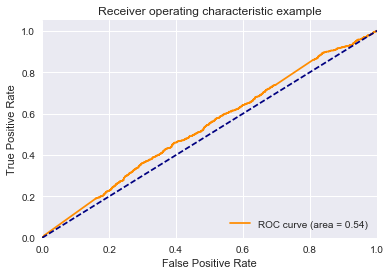

Area Under the ROC Curve is  0.537085805859


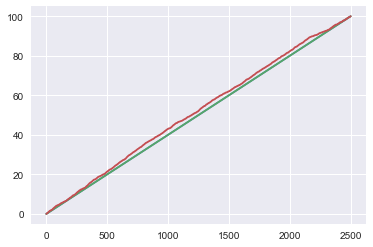

mouseclick_button_time
Logistic Regression Binary
[[1073  220]
 [ 872  335]]
             precision    recall  f1-score   support

          0       0.55      0.83      0.66      1293
          1       0.60      0.28      0.38      1207

avg / total       0.58      0.56      0.53      2500



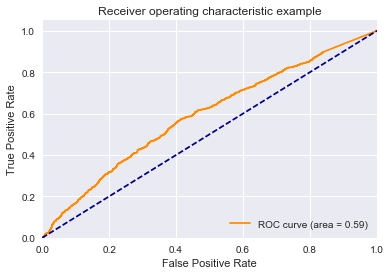

Area Under the ROC Curve is  0.591610167808


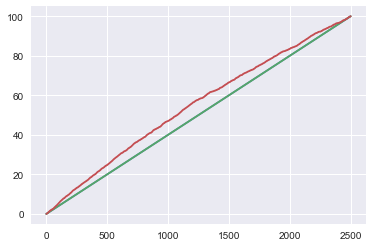

      actual      prob  total_select_percent  random_select_percent  \
1249     1.0  0.447593                  50.0                   50.0   

      model_select_percent  
1249             57.829329  
KNN


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[833 460]
 [593 614]]
             precision    recall  f1-score   support

          0       0.58      0.64      0.61      1293
          1       0.57      0.51      0.54      1207

avg / total       0.58      0.58      0.58      2500



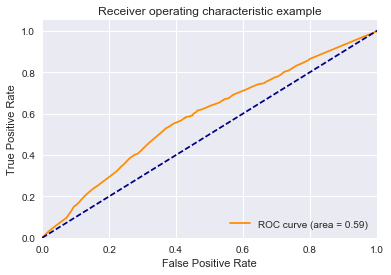

Area Under the ROC Curve is  0.586004494278


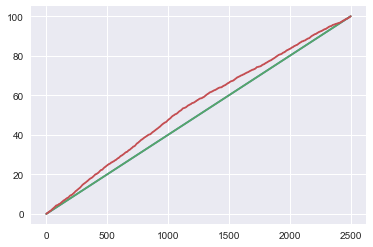

Random Forrest


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[775 518]
 [682 525]]
             precision    recall  f1-score   support

          0       0.53      0.60      0.56      1293
          1       0.50      0.43      0.47      1207

avg / total       0.52      0.52      0.52      2500



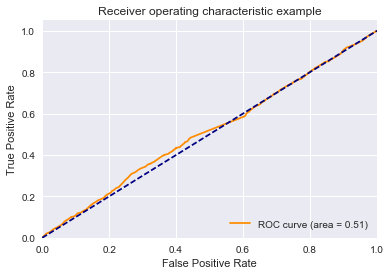

Area Under the ROC Curve is  0.511364488281


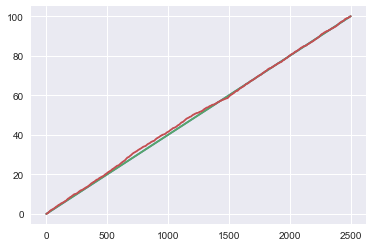

Decision Tree
[[778 515]
 [685 522]]
             precision    recall  f1-score   support

          0       0.53      0.60      0.56      1293
          1       0.50      0.43      0.47      1207

avg / total       0.52      0.52      0.52      2500



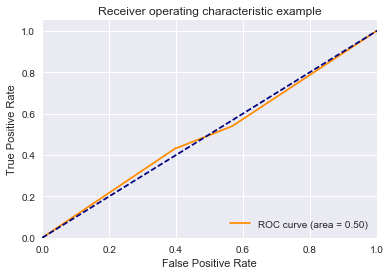

Area Under the ROC Curve is  0.50107871651


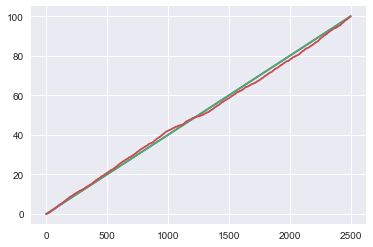

Naive Bayes
[[1101  192]
 [ 917  290]]
             precision    recall  f1-score   support

          0       0.55      0.85      0.67      1293
          1       0.60      0.24      0.34      1207

avg / total       0.57      0.56      0.51      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


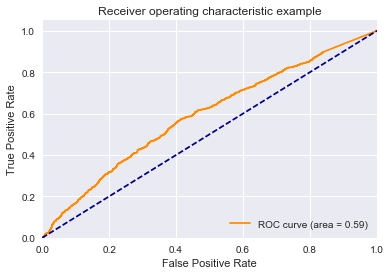

Area Under the ROC Curve is  0.591610167808


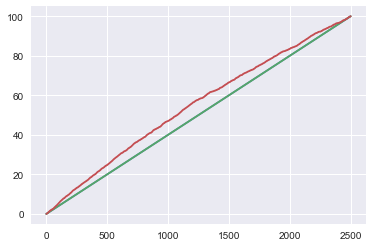

Naive Bayes
[[1085  208]
 [ 900  307]]
             precision    recall  f1-score   support

          0       0.55      0.84      0.66      1293
          1       0.60      0.25      0.36      1207

avg / total       0.57      0.56      0.51      2500



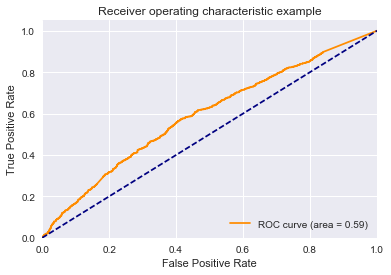

Area Under the ROC Curve is  0.591673923254


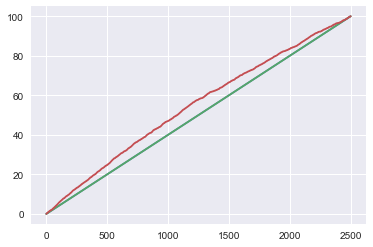

keytype_changed_time
Logistic Regression Binary
[[1293    0]
 [1207    0]]
             precision    recall  f1-score   support

          0       0.52      1.00      0.68      1293
          1       0.00      0.00      0.00      1207

avg / total       0.27      0.52      0.35      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


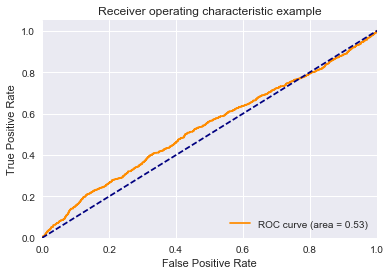

Area Under the ROC Curve is  0.534815599388


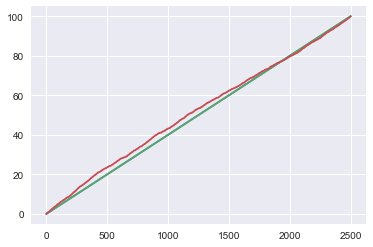

      actual      prob  total_select_percent  random_select_percent  \
1249     0.0  0.468892                  50.0                   50.0   

      model_select_percent  
1249             53.355427  
KNN


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[924 369]
 [770 437]]
             precision    recall  f1-score   support

          0       0.55      0.71      0.62      1293
          1       0.54      0.36      0.43      1207

avg / total       0.54      0.54      0.53      2500



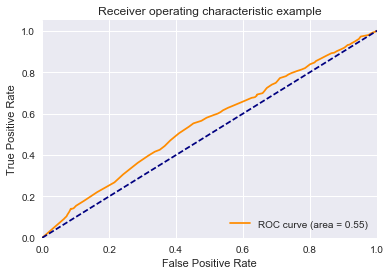

Area Under the ROC Curve is  0.55284941989


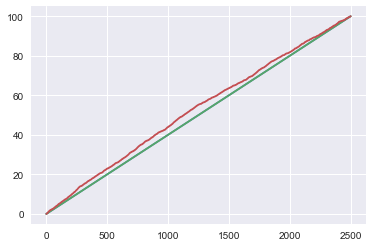

Random Forrest


C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[702 591]
 [618 589]]
             precision    recall  f1-score   support

          0       0.53      0.54      0.54      1293
          1       0.50      0.49      0.49      1207

avg / total       0.52      0.52      0.52      2500



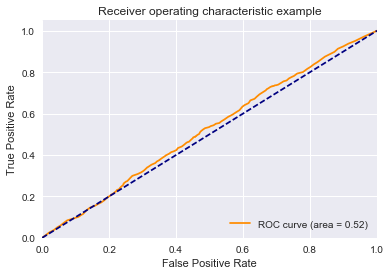

Area Under the ROC Curve is  0.521483022149


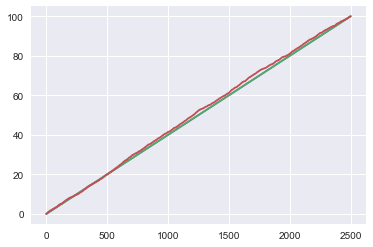

Decision Tree
[[702 591]
 [619 588]]
             precision    recall  f1-score   support

          0       0.53      0.54      0.54      1293
          1       0.50      0.49      0.49      1207

avg / total       0.52      0.52      0.52      2500



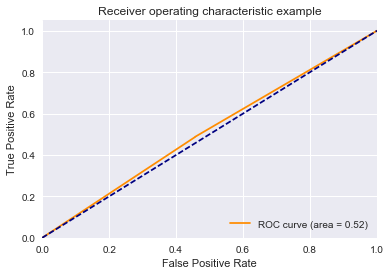

Area Under the ROC Curve is  0.515265744872


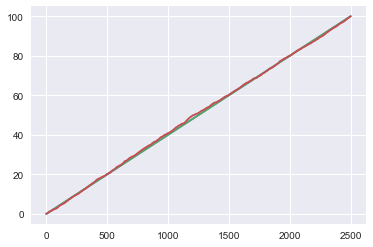

Naive Bayes
[[1267   26]
 [1168   39]]
             precision    recall  f1-score   support

          0       0.52      0.98      0.68      1293
          1       0.60      0.03      0.06      1207

avg / total       0.56      0.52      0.38      2500



C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


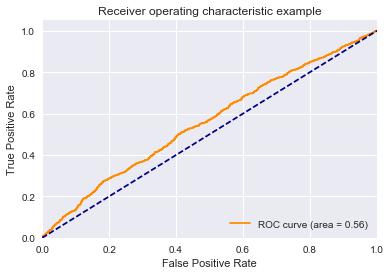

Area Under the ROC Curve is  0.55776371527


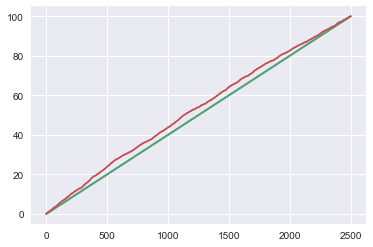

Naive Bayes
[[1137  156]
 [ 978  229]]
             precision    recall  f1-score   support

          0       0.54      0.88      0.67      1293
          1       0.59      0.19      0.29      1207

avg / total       0.57      0.55      0.48      2500



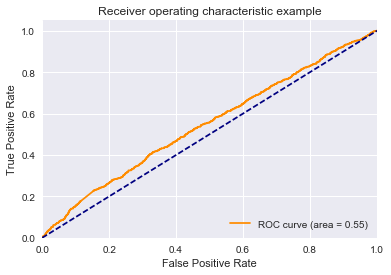

Area Under the ROC Curve is  0.547790633524


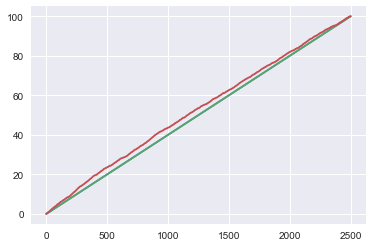

In [5]:
data = pd.read_csv('master_with_work_duration.csv')
x = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance','work_duration','mousemove_distance_time','mouseclick_button_time', 'keytype_changed_time']]
y =data[['error']]

from sklearn.model_selection import train_test_split
x_1, x_2, y_1, y_2 = train_test_split(x, y, test_size = 0.5, random_state =0)

for col in ['keytype_changed', 'mouseclick_button', 'mousemove_distance','work_duration','mousemove_distance_time','mouseclick_button_time', 'keytype_changed_time']:
    print(col)
    x_train = x_1[[col]]
    y_train = y_1
    x_test = x_2[[col]]
    y_test = y_2
    #1) Binary Logistic regression 
    print ('Logistic Regression Binary')

    #Importing logistic resgression and fitting it to data
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(x_train,y_train)

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()

    print(df[df['random_select_percent'] == 50])


    #------------------------------------------------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------------------------------------------------


    #2) KNN
    print ('KNN')

    #Importing KNN Classifier and fitting it to data
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
    model.fit(x_train,y_train)

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()



    #-------------------------------------------------------------------------------------------------------------------------------
    #-------------------------------------------------------------------------------------------------------------------------------

    #3) Random Forrest
    print ('Random Forrest')

    #Importing Random Forrest Classifier and fitting it to data
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators = 150)
    model.fit(x_train,y_train) 

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()



    #--------------------------------------------------------------------------------------------------------------------------------
    #-------------------------------------------------------------------------------------------------------------------------------
    #4) Decision Tree
    print ('Decision Tree')

    #Importing Decision Tree Classifier and fitting it to data
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
    model.fit(x_train,y_train)

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()


    #-----------------------------------------------------------------------------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------------
    #5) Naive Bayes 
    print ('Naive Bayes')

    #Importing Naive Bayes Classifier and fitting it to data
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train,y_train) 

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()


    #-----------------------------------------------------------------------------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------------

    #6) SVM with hernel 
    print ('SVM With Kernel')

    #Importing Support Vector Classifier  and fitting it to data
    from sklearn.svm import SVC
    model = SVC(kernel = 'rbf', random_state = 0, probability = True)
    model.fit(x_train,y_train) 

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()


